In [19]:
%cd kk-mag-counter

/home/jovyan/kk-mag-counter


In [20]:
!git add .

In [21]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	new file:   00 installing.ipynb
	new file:   01 extracting and examining sociology for completeness.ipynb
	new file:   02 first try at counting.ipynb
	new file:   common_imports.py
	modified:   first.ipynb



In [22]:
!git push origin main

Username for 'https://github.com': ^C


In [1]:
from common_imports import *

In [14]:
with open('datasets/s4/MAG/Authors.txt') as inf:
    for l in genlim(10)(inf):
        print(l.split("\t"))

['584', '19418', 'gozde ozdikmenlidemir', 'Gözde Özdikmenli-Demir', '79946792', '5', '5', '11', '2016-06-24\n']
['859', '19820', 'gy tolmar', 'Gy. Tolmár', '', '3', '3', '2', '2016-06-24\n']
['978', '17856', 'ximena faundez', 'Ximena Faúndez', '149744451', '20', '20', '61', '2016-06-24\n']
['1139', '19600', 'jennifer putzi', 'Jennifer Putzi', '', '4', '4', '7', '2016-06-24\n']
['1476', '21132', '勲矢 手島', '勲矢 手島', '', '1', '1', '0', '2016-06-24\n']
['1611', '20439', '純子 貝原', '純子 貝原', '', '2', '2', '0', '2016-06-24\n']
['1799', '18376', 'hossein gholaman', 'Hossein Gholaman', '62318514', '2', '2', '248', '2016-06-24\n']
['1968', '19522', 'maria isabel lorca martin de villodres', 'María Isabel Lorca Martín de Villodres', '82767444', '5', '5', '0', '2016-06-24\n']
['2255', '19132', 'bin liuy', 'Bin Liuy', '99065089', '3', '3', '25', '2016-06-24\n']
['2722', '19310', 'susan macicak', 'Susan Macicak', '', '2', '2', '18', '2016-06-24\n']
['2741', '19522', '良介 立野', '良介 立野', '', '5', '5', '0', '

# top level fields

In [3]:
# top level fields
fields = []
with open('datasets/s4/MAG/FieldsOfStudy.txt') as inf:
    i = 0
    for l in inf:
        l = l.split("\t")
        if l[5] != '0':
            continue
        
        fields.append(l)
        i += 1
        
        if i > 20 and False:
            break
            
print("\n".join(
    f"{x[3]} ({int(x[6]):0,} papers). ID={x[0]}"
    for x in sorted(fields, key=lambda x:-int(x[6])))
)

Medicine (29,994,817 papers). ID=71924100
Materials science (29,648,694 papers). ID=192562407
Computer science (25,150,420 papers). ID=41008148
Chemistry (19,431,836 papers). ID=185592680
Engineering (14,587,094 papers). ID=127413603
Biology (14,369,768 papers). ID=86803240
Physics (10,851,783 papers). ID=121332964
Art (8,849,799 papers). ID=142362112
Psychology (8,674,914 papers). ID=15744967
Political science (8,516,435 papers). ID=17744445
Mathematics (6,870,568 papers). ID=33923547
Geology (6,600,805 papers). ID=127313418
Environmental science (6,160,852 papers). ID=39432304
Geography (5,653,780 papers). ID=205649164
Business (5,599,468 papers). ID=144133560
Sociology (4,688,396 papers). ID=144024400
Philosophy (4,263,552 papers). ID=138885662
History (3,456,630 papers). ID=95457728
Economics (3,178,352 papers). ID=162324750


# find the soc papers

In [4]:
soc_papers = []
with open('datasets/s4/MAG/PaperFieldsOfStudy.txt') as inf:
    for i,l in enumerate(inf):
        if (i+1)%1e6 == 0:
            print(i+1, 'documents processed...')
        l = l.split('\t')
        if l[1] == '144024400':
            soc_papers.append((l[0],l[2]))

In [5]:
len(soc_papers)

4688396

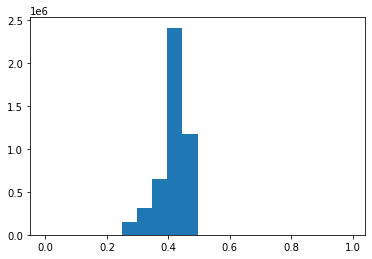

In [6]:
from matplotlib import pyplot as plt
plt.hist([float(x[1]) for x in soc_papers], bins=20);

In [7]:
import pickle
with open('soc_papers.pickle', 'wb') as outf:
    pickle.dump(soc_papers, outf)

In [8]:
import pickle
with open('soc_papers.pickle', 'rb') as inf:
    soc_papers = pickle.load(inf)

In [9]:
soc_papers[0]

('125525149', '0.3643104\n')

In [10]:
soc_papers = set([int(x[0]) for x in soc_papers])

In [11]:
list(soc_papers)[0]

2080374784

In [12]:
subf = defaultdict(int)
with open('datasets/s4/MAG/PaperFieldsOfStudy.txt') as inf:
    for l in inf:
        break
        l = l.split("\t")
        if l[0] not in soc_papers:
            continue
        
        subf[l[1]] += 1

NameError: name 'defaultdict' is not defined

In [ ]:
# subfields of soc
from collections import defaultdict, Counter

In [ ]:
list(soc_papers)[:5]

In [ ]:
# lol... only kept top level (0) fields...
# this was unhelpful...
for X,c in Counter(subf).most_common(50):
    f = [x for x in fields if x[0] == X]
    if not len(f):
        continue
    f = f[0]
    print(f[3], f"({f[1]})")

In [ ]:
with open('datasets/s4/MAG/PaperReferences.txt') as inf:
    for l in genlim(10)(inf):
        print(l.split("\t"))

In [ ]:
list(soc_papers)[0]

# citations

In [ ]:
break

In [ ]:
# let's look for all the citations, to get a good idea of what we have here...
clinks = []

c_i = 0
def dump():
    global c_i, clinks
    print(f'Dumping {c_i}...')
    with open(f'citations.{c_i}.pickle', 'wb') as outf:
        pickle.dump(clinks, outf)
    c_i += 1
    clinks = []

with open('datasets/s4/MAG/PaperReferences.txt') as inf:
    for i,l in enumerate(inf):
        if (i+1)%10000000 == 0:
            print(f'Citation link {i+1:,}. Collected {len(clinks):,}.')
        
        l = l[:-1] # strip the trailing \n from the line
        l = l.split('\t') # tab delimited
        l = list(map(int,l)) # map to integers. saving on memory this way hopefully
        
        if l[0] in soc_papers or l[1] in soc_papers: # to or from any of these papers...
            clinks.append((l[0],l[1]))
            
        if len(clinks) >= 1e6:
            dump()
            
dump()